In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df = df[['location', 'size', 'total_sqft', 'bath', 'balcony', 'price']]
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [5]:
# Replace missing values with a default value (e.g., '0')
df['size'] = df['size'].fillna('0')

# Extract digits from 'size' column and convert to integer
df['size'] = df['size'].astype(str).str.extract('(\d+)').astype(float).astype(int)

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df = df.dropna(subset=['size']).copy()

df

C:\Users\MY PC\AppData\Local\Temp\ipykernel_25568\23399775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'].fillna('0')
C:\Users\MY PC\AppData\Local\Temp\ipykernel_25568\23399775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'].astype(str).str.extract('(\d+)').astype(float).astype(int)


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,0.0,231.00
13316,Richards Town,4,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [6]:
df = df[df['size'] != 0].copy()
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,0.0,231.00
13316,Richards Town,4,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [7]:
# Remove non-numeric characters from 'total_sqft' column
df['total_sqft'] = df['total_sqft'].str.replace(r'\D', '', regex=True)

# Convert 'total_sqft' column to integer type
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [8]:
df['bath'].replace(np.nan, int(df['bath'].mode()[0]), inplace=True)

In [9]:
df['bath'] = df['bath'].astype(int)

In [10]:
df['balcony'].replace(np.nan, int(df['balcony'].mode()[0]), inplace=True)
df['balcony'] = df['balcony'].astype(int)

In [11]:
df['price'] = df['price'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13304 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    13303 non-null  object
 1   size        13304 non-null  int32 
 2   total_sqft  13304 non-null  int64 
 3   bath        13304 non-null  int32 
 4   balcony     13304 non-null  int32 
 5   price       13304 non-null  int32 
dtypes: int32(4), int64(1), object(1)
memory usage: 519.7+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()
df['location_encoded'] = label_encoder.fit_transform(df['location'])

In [15]:
df2 = df.copy()

In [16]:
df2['location'] = df2['location_encoded']

In [17]:
df2

,location,size,total_sqft,bath,balcony,price,location_encoded
0,419,2,1056,2,1,39,419
1,317,4,2600,5,3,120,317
2,1178,3,1440,2,3,62,1178
3,756,3,1521,3,1,95,756
4,715,2,1200,2,1,51,715
...,...,...,...,...,...,...,...
13315,1251,5,3453,4,0,231,1251
13316,1003,4,3600,5,2,400,1003
13317,971,2,1141,2,1,60,971
13318,906,4,4689,4,1,488,906


In [18]:
# Get the mapping between original categorical values and encoded numerical labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Encoding Mapping:")
print(label_mapping)

Encoding Mapping:
{' Anekal': 0, ' Banaswadi': 1, ' Basavangudi': 2, ' Bhoganhalli': 3, ' Devarabeesana Halli': 4, ' Devarachikkanahalli': 5, ' Electronic City': 6, ' Mysore Highway': 7, ' Rachenahalli': 8, ' Sector 1 HSR Layout': 9, ' Thanisandra': 10, ' Whitefield': 11, ' ittamadu': 12, ' south': 13, '1 Annasandrapalya': 14, '1 Giri Nagar': 15, '1 Immadihalli': 16, '1 Ramamurthy Nagar': 17, '12th cross srinivas nagar banshankari 3rd stage': 18, '1A Block Koramangala': 19, '1Channasandra': 20, '1Hanuman Nagar': 21, '1Hoysalanagar': 22, '1Kasavanhalli': 23, '1st Block BEL Layout': 24, '1st Block HBR Layout': 25, '1st Block HRBR Layout': 26, '1st Block Jayanagar': 27, '1st Block Koramangala': 28, '1st Phase JP Nagar': 29, '1st Stage Domlur': 30, '1st Stage Indira Nagar': 31, '1st Stage Radha Krishna Layout': 32, '2 Bedroom Furnished Farm House in Kolar Road': 33, '2Electronic City Phase II': 34, '2nd Block Bel Layout': 35, '2nd Block Hbr Layout': 36, '2nd Block Hrbr Layout': 37, '2nd Bl

In [19]:
df2.drop('location_encoded', axis=1, inplace=True)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13304 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   location    13304 non-null  int32
 1   size        13304 non-null  int32
 2   total_sqft  13304 non-null  int64
 3   bath        13304 non-null  int32
 4   balcony     13304 non-null  int32
 5   price       13304 non-null  int32
dtypes: int32(5), int64(1)
memory usage: 467.7 KB


In [21]:
df2

,location,size,total_sqft,bath,balcony,price
0,419,2,1056,2,1,39
1,317,4,2600,5,3,120
2,1178,3,1440,2,3,62
3,756,3,1521,3,1,95
4,715,2,1200,2,1,51
...,...,...,...,...,...,...
13315,1251,5,3453,4,0,231
13316,1003,4,3600,5,2,400
13317,971,2,1141,2,1,60
13318,906,4,4689,4,1,488


In [22]:
minimum,Q1,median,Q3,maximum=np.quantile(df2['size'], [0,0.25,0.50,0.75,1.0])

In [23]:
IQR = Q3-Q1
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
print(lower_fence, higher_fence)

0.5 4.5


In [24]:
df2 = df2[df2['size'] < 5]

In [25]:
minimum,Q1,median,Q3,maximum=np.quantile(df2['total_sqft'], [0,0.25,0.50,0.75,1.0])
IQR = Q3-Q1
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
print(lower_fence, higher_fence)

237.5 2537.5


In [26]:
df2 = df2[(df2['total_sqft'] > 230) & (df2['total_sqft'] < 2600)]

In [27]:
minimum,Q1,median,Q3,maximum=np.quantile(df2['bath'], [0,0.25,0.50,0.75,1.0])
IQR = Q3-Q1
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
print(lower_fence, higher_fence)

0.5 4.5


In [28]:
df2 = df2[df2['bath'] < 5]

In [29]:
minimum,Q1,median,Q3,maximum=np.quantile(df2['balcony'], [0,0.25,0.50,0.75,1.0])
IQR = Q3-Q1
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
print(lower_fence, higher_fence)

-0.5 3.5


In [30]:
df2 = df2[df2['balcony'] < 4]

In [31]:
df2

,location,size,total_sqft,bath,balcony,price
0,419,2,1056,2,1,39
2,1178,3,1440,2,3,62
3,756,3,1521,3,1,95
4,715,2,1200,2,1,51
5,1251,2,1170,2,1,38
...,...,...,...,...,...,...
13312,236,2,1262,2,2,47
13313,1178,3,1345,2,1,57
13314,474,3,1715,3,3,112
13317,971,2,1141,2,1,60


In [32]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

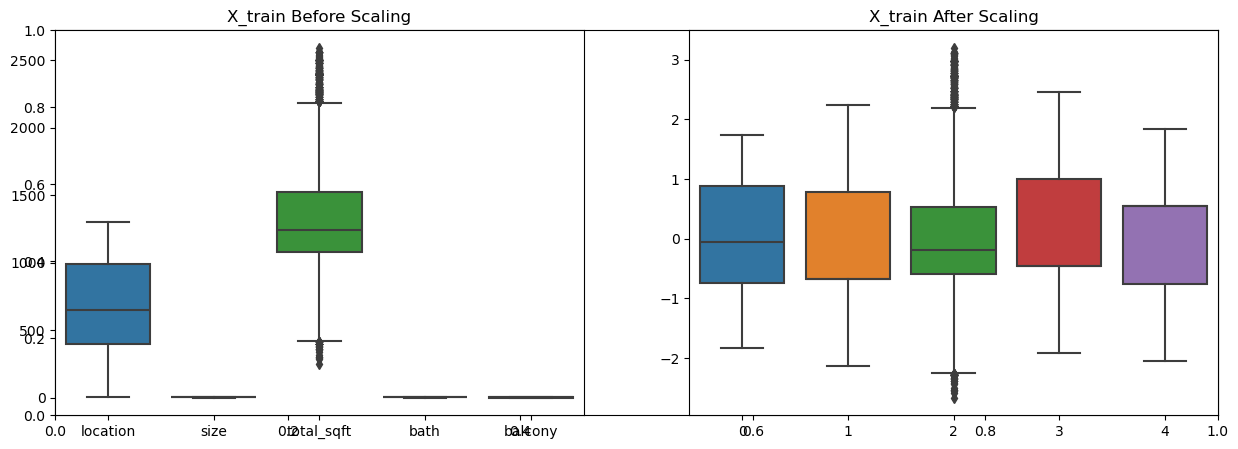

In [35]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [36]:
from sklearn.svm import SVR

In [37]:
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [39]:
y_pred = svr.predict(X_test_scaled)

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(r2_score(y_pred, y_test))

1777.7826689428846
23.217722321245247
-1.1124083862644842


In [51]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [3,4,5],
    'C': [.1,1,10,100],
    'epsilon': [0.1, 0.2, 0.3]
}

In [52]:
grid = GridSearchCV(SVR(), scoring='neg_mean_absolute_error', param_grid=parameters, refit=True, cv=5, n_jobs=5)

In [53]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=5,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'epsilon': [0.1, 0.2, 0.3],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_mean_absolute_error')

In [54]:
grid.best_params_

{'C': 100, 'degree': 3, 'epsilon': 0.3, 'kernel': 'rbf'}

In [55]:
svr = SVR(kernel='rbf', C=100, epsilon=0.3, degree=3)

In [57]:
svr.fit(X_train_scaled, y_train)

SVR(C=100, epsilon=0.3)

In [59]:
y_pred =svr.predict(X_test_scaled)

In [60]:
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(r2_score(y_pred, y_test))

1389.882539861502
20.679911241969954
-0.020475595611312736


In [44]:
df2

,location,size,total_sqft,bath,balcony,price
0,419,2,1056,2,1,39
2,1178,3,1440,2,3,62
3,756,3,1521,3,1,95
4,715,2,1200,2,1,51
5,1251,2,1170,2,1,38
...,...,...,...,...,...,...
13312,236,2,1262,2,2,47
13313,1178,3,1345,2,1,57
13314,474,3,1715,3,3,112
13317,971,2,1141,2,1,60


In [45]:
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf']
}

In [46]:
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [47]:
grid_search.best_params_

{'C': 100, 'epsilon': 1, 'kernel': 'rbf'}

In [48]:
svr = SVR(C=100, epsilon=1, kernel='rbf')
svr.fit(X_train_scaled, y_train)

SVR(C=100, epsilon=1)

In [49]:
y_pred = svr.predict(X_test_scaled)

In [50]:
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(r2_score(y_pred, y_test))

1391.0893317683242
20.68556000397674
-0.019035821860018398


In [1]:
##########################################################################################################################
# Ans 01:

In [15]:
# The best metric for this case would  be mean squared error

In [3]:
##########################################################################################################################
# Ans 02:

In [4]:
# If the goal is to predict the actual price of a house as accurately as possible, MSE (Mean Squared Error) would be the more appropriate
# evaluation metric to use.

# Here's why:
# 1. Mean Squared Error (MSE): MSE measures the average squared difference between the predicted values and the actual values. It penalizes larger errors more heavily
# than smaller errors. In the context of predicting house prices, MSE directly reflects how close the predicted prices are to the actual prices. Lower MSE indicates
# better predictive accuracy.
# 2. R-squared (Coefficient of Determination): R-squared measures the proportion of the variance in the dependent variable (house prices) that is predictable from the
# independent variables (features) in the model. While R-squared is useful for understanding how well the independent variables explain the variation in the dependent
# variable, it may not directly reflect the accuracy of individual predictions. Moreover, high R-squared doesn't necessarily mean that individual predictions are accurate.

# In summary, while R-squared provides information about the overall fit of the model, MSE gives a more direct measure of prediction accuracy for individual hous
# prices. Therefore, MSE would be the more appropriate metric for your goal of predicting house prices as accurately as possible.

In [5]:
##########################################################################################################################
# Ans 03:

In [6]:
# When dealing with a dataset that contains a significant number of outliers, it's important to choose a regression metric that is robust to outliers. In
# this scenario, the Mean Absolute Error (MAE) would be the most appropriate metric to use with your SVM model.

# Here's why:
# 1. Robustness to Outliers: MAE is less sensitive to outliers compared to other metrics like Mean Squared Error (MSE) or R-squared. Outliers have a significant impact
# on MSE because it squares the errors, magnifying the effect of large errors. On the other hand, MAE calculates the average absolute difference between the predicted
# values and the actual values, making it less affected by outliers.
# 2. Interpretability: MAE provides a straightforward interpretation as it represents the average magnitude of errors in the predictions. This makes it easier to understand
# and communicate the model's performance, especially in the presence of outliers.
# 3. Model Stability: Since MAE treats all errors equally regardless of their magnitude, it can lead to more stable model performance, particularly in the presence of
# outliers. This stability is beneficial for assessing the model's consistency across different subsets of data.

# Therefore, when dealing with a dataset containing a significant number of outliers, using MAE as the evaluation metric for your SVM regression model would be the most
# appropriate choice.

In [7]:
##########################################################################################################################
# Ans 04:

In [10]:
# When both Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values are very close, it indicates that the differences between predicted and
# actual values are relatively consistent across the dataset. In such cases, it's generally more common to use RMSE as the evaluation metric. 

# Here's why:
# 1. Interpretability: RMSE is interpreted in the same units as the target variable, which in your case is likely the house prices. This makes it easier to understand
# and communicate the magnitude of the prediction errors in a more intuitive manner.
# 2. Sensitivity to Scale: RMSE is sensitive to the scale of the target variable, whereas MSE is not. By taking the square root of MSE, RMSE provides a measure of the
# average magnitude of the errors in the same units as the target variable. This ensures that the evaluation metric is more aligned with the problem domain.
# 3. Penalization of Large Errors: RMSE penalizes larger errors more heavily than smaller errors due to the square root transformation. This can be beneficial in scenarios
# where you want to prioritize reducing the impact of larger errors in your predictions.

# Therefore, when MSE and RMSE values are very close and considering the factors mentioned above, using RMSE as the evaluation metric for your SVM regression model with a
# polynomial kernel would be the preferred choice.

In [11]:
##########################################################################################################################
# Ans 05:

In [12]:
# When comparing the performance of different SVM regression models using different kernels and aiming to measure how well the models explain the variance
# in the target variable, the most appropriate evaluation metric would be the coefficient of determination, commonly known as R-squared.

# Here's why R-squared is the most suitable metric for this goal:
# 1. Measuring Explained Variance: R-squared quantifies the proportion of the variance in the target variable that is explained by the independent variables (features)
# included in the model. In other words, it assesses the goodness of fit of the model to the data by measuring how well the model captures the variability in the
# target variable.
# 2. Comparison Across Models: R-squared allows for direct comparison of the explanatory power of different SVM regression models with different kernels. A higher R-squared
# value indicates that a larger proportion of the variance in the target variable is explained by the model, suggesting better performance in capturing the underlying
# patterns in the data.
# 3. Interpretability: R-squared has a straightforward interpretation, as it represents the percentage of variance in the target variable that is accounted for by the
# independent variables in the model. This makes it easy to understand and communicate the model's explanatory power to stakeholders.

# Therefore, when the goal is to measure how well SVM regression models with different kernels explain the variance in the target variable, R-squared would be the most
# appropriate evaluation metric to use.

In [14]:
##########################################################################################################################